### Problem 1

Given the iris data set, use the last two features "penal length" and "penal width" to predict the "species". Build a logistic regression and:

- (1) Print out the accuracy
- (2) Make a prediction given a new observation $\text{penal length} = 7$, $\text{penal width}=4$, as well as the probabilities $p(y=i|x)$.
- (3) Plot the linear boundaries, and compare it with the LDA's boundary.

In [1]:
### your solution
from __future__ import print_function
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
print(type(iris.data))

iris.x = iris.data[:, [2, 3]]
iris.y = iris.target

logit = linear_model.LogisticRegression()
logit.fit(iris.x, iris.y)
## (1)
print("Accuracy of logistic regression is: " + str(logit.score(iris.x, iris.y)))

## (2)
new_obs = np.array([7, 4]).reshape(1, -1)
print("Prediction of the new observation is: " + str(logit.predict(new_obs)))
proba_msg = "Probability that the new observation belongs to each class are: "
print(proba_msg + str(np.round(logit.predict_proba(new_obs), 4)))

<class 'numpy.ndarray'>
Accuracy of logistic regression is: 0.873333333333
Prediction of the new observation is: [2]
Probability that the new observation belongs to each class are: [[ 0.      0.1103  0.8897]]


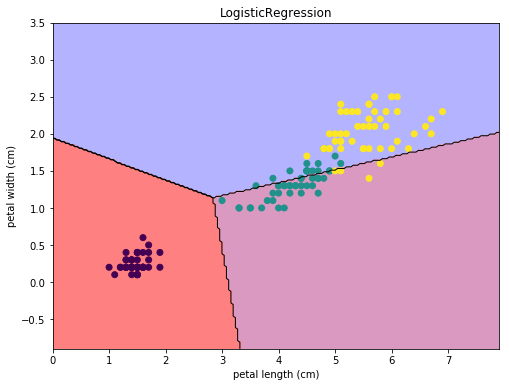

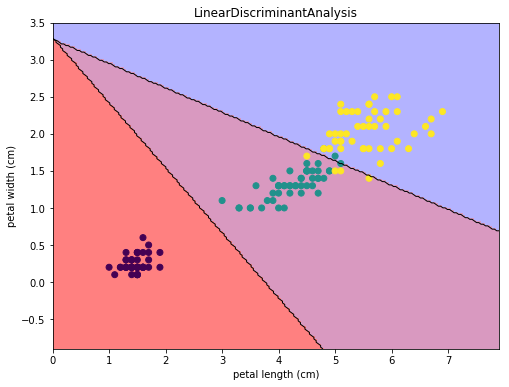

In [2]:
from sklearn import discriminant_analysis
LDA = discriminant_analysis.LinearDiscriminantAnalysis()
LDA.fit(iris.data[:,2:], iris.target)

def plot_model(model, x, y, label):
    """
    model: a fitted model
    x, y: two variables, should be numpy arrays
    label: true label
    """
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    import  matplotlib.pyplot as plt
    from matplotlib import colors
    cmap_name = 'red_blue_classes'
    cmap = colors.LinearSegmentedColormap(
        name=cmap_name,
        segmentdata={
            'red': [(0, 1, 1), (1, 0.7, 0.7)],
            'green': [(0, 1, 0.5), (1, 0.7, 0.7)],
            'blue': [(0, 1, 0.5), (1, 1, 1)]
    })
    plt.cm.register_cmap(cmap=cmap)
    nx, ny = 200, 200
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ## plot colormap
    plt.pcolormesh(xx, yy, Z, cmap=cmap_name)
    ## plot boundaries
    plt.contour(xx, yy, Z, [0.5], linewidths=1., colors='k')
    plt.contour(xx, yy, Z, [1], linewidths=1., colors='k')
    ## plot scatters and true labels
    plt.scatter(x, y, c=label)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

plt.rcParams['figure.figsize'] = 8, 6
plot_model(logit, iris.data[:,2], iris.data[:,3], iris.target)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(logit.__class__.__name__)
plt.show()
    
plt.rcParams['figure.figsize'] = 8, 6
plot_model(LDA, iris.data[:,2], iris.data[:,3], iris.target)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title(LDA.__class__.__name__)
plt.show()

### Problem 2

There are three files in the "data" folder:

    - "spam_train.csv"
    - "spam_test.csv"
    - "spam.txt"

The file "spam_train.csv" in the "data" folder contains 2300 emails and 58 variables. The last variable "spam" is a factor with two levels: "email", "spam". If you want to know more information about the data set, please read the file "spam.txt".

Your assignment is based on the "spam_train.csv" file, try to build a classifier to predict the variable "spam". You need to write a report which contains:

- (1) The features you are using to build the model.
- (2) At least two models we have learned.
- (3) After building the models, report the corresponding accuracy on the training set.
- (4) Use you models to make prediction on the "spam_test.csv" file, report the corresponding accuracy on this test set.
- (5) Compare the performance of the models in the following two aspect:
    - (a) the performance of two different models.
    - (b) the performance of one model on the training set and test set.
    
The following codes may be a useful beginning:

In [3]:
import pandas as pd
import numpy as np
train = pd.read_csv('data/spam_train.csv')
test = pd.read_csv('data/spam_test.csv')
## separate the predictors and response in the training data set
x = np.array(train.iloc[:, 0:57])
y = np.array(train.iloc[:, -1])
## separate the predictors and response in the test data set
x2 = np.array(test.iloc[:, 0:57])
y2 = np.array(test.iloc[:, -1])

## have a look at the training data set
train.head()

,A.1,A.2,A.3,A.4,A.5,A.6,A.7,A.8,A.9,A.10,...,A.49,A.50,A.51,A.52,A.53,A.54,A.55,A.56,A.57,spam
0,0.32,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.0,0.234,0.0,0.058,0.0,0.0,1.068,3,47,email
1,0.00,0.0,0.71,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.342,0.0,0.0,1.000,1,31,email
2,0.00,0.0,0.00,0.0,0.00,0.17,0.0,0.0,0.0,0.0,...,0.0,0.055,0.0,0.000,0.0,0.0,1.685,7,204,email
3,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.0,0.0,1.800,5,9,email
4,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.471,0.0,0.000,0.0,0.0,1.424,8,47,email


In [4]:
from sklearn import linear_model, neighbors, naive_bayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

logit = linear_model.LogisticRegression()
lda = LinearDiscriminantAnalysis()
knn = neighbors.KNeighborsClassifier()
gnb = naive_bayes.GaussianNB()
mnb = naive_bayes.MultinomialNB()

models = [logit, lda, knn, gnb, mnb]

In [5]:
for model in models:
    model.fit(x, y)

In [6]:
score_train = []
score_test = []
for model in models:
    score_train.append(model.score(x, y))
    score_test.append(model.score(x2, y2))
print([m.__class__.__name__ for m in models])
print(np.round([score_train, score_test], 3))

['LogisticRegression', 'LinearDiscriminantAnalysis', 'KNeighborsClassifier', 'GaussianNB', 'MultinomialNB']
[[ 0.933  0.892  0.853  0.831  0.811]
 [ 0.925  0.897  0.788  0.817  0.799]]


We can see that with the default hyperparameters, the highest training score comes from the logistic regression, while the naive bayesian models performs the worst.
Comparing with the accuracy of the training set and test set, the test scores are lower than the training scores for every model except one. Since the algorithms are trained with the training data set, this is to be expected. It is also reasonable to see a model that sometimes scores higher on the test set. This generally happens more frequently with smaller data sets.

Multinomial naive bayes is widely used in the spam filter problem. Therefore, it should perform reasonably well in this case. We can attempt to improve this model with feature selection.

If you have read the file "spam.text", you may notice that only the first 48 continuous features refers to the word frequency. Since we used all 57 features previously, let's use fewer features and see what the result is.

In [7]:
x_48 = train.iloc[:, 0:48]
mnb.fit(x_48, y)
print("The accuracy of Multinomial Naive Bayes in the training set is: " + str(mnb.score(x_48, y)) + '\n')
print("The accuracy of Multinomial Naive Bayes in the test set is: " + str(mnb.score(test.iloc[:, 0:48], y2)))

The accuracy of Multinomial Naive Bayes in the training set is: 0.871304347826

The accuracy of Multinomial Naive Bayes in the test set is: 0.858322468492


While in the previous Multinomial Naive Bayes model, the accuracy in the training set and test set are: 0.81086957 and 0.79878314.
After discarding a few features, it performs better. This indicates that more features may not be better.